## Distrbution of  `null-count` in `training` dataset

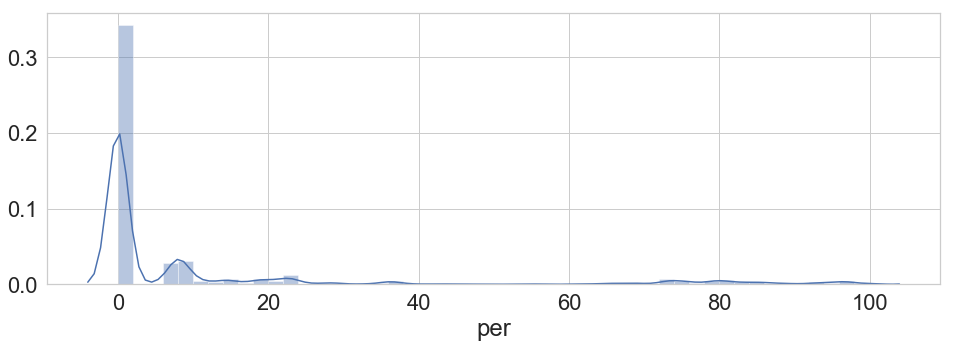

In [13]:
plt.figure(figsize=(16,5))
sns.distplot(nulls['per'], bins=50, hist=True)

## Null handling
1. We have `150` numerical feature with null percentage 50%
2. We have `148` categorical feature with null percentage > 0

1. To handle num value, i use two tech
    - >50% use generalized rank model to fill those value
    - Use MICE for all
    - use SVD on >50% and low feature impotance
2. For Cat feature,
    - make a new catgory(factorize them)
    - Use for encoding based feature(target encoding)

# Target variable countplot

1.0    15760
0.0     1761
Name: Col2, dtype: int64

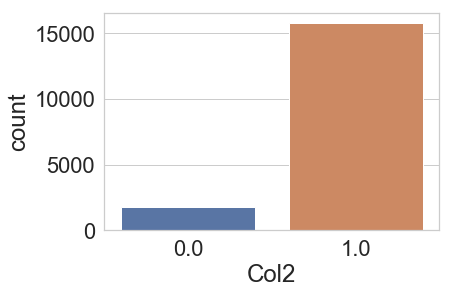

In [15]:
gc.collect()
sns.countplot(df[df['flag'] == 'train']['Col2'])
df[df['flag'] == 'train']['Col2'].value_counts()

## Correct `dtypes` of following two columns

In [40]:
df['Col754']  = df['Col754'].replace('-',0).astype('float')
df['Col843']  = df['Col843'].replace('-',0).astype('float')


## There are some intersting feature, with good importance as well
    - create qunatile bins
    - use them for feature-interaction

## without considering class weight, while building the model
- this is obvious, as if we don't consider unbalance, while building model, it will shift towards majority class
- here we can see the `99%` are choosing `class-1`
- to avoid that i count the weight for each class and assign it to `class-pos-weight`

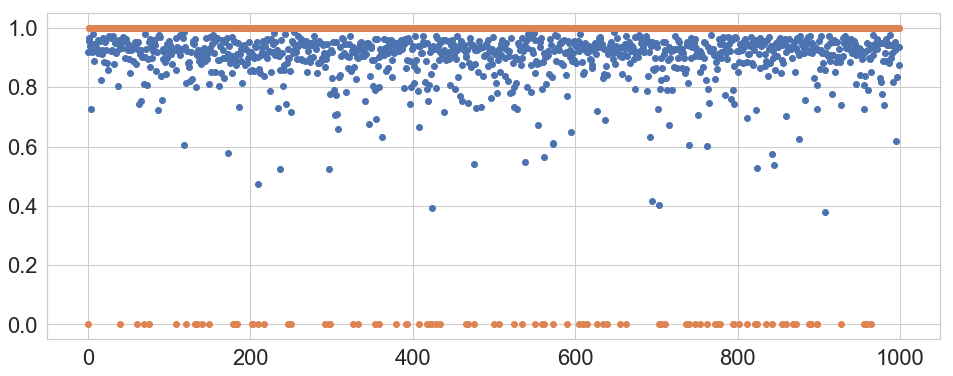

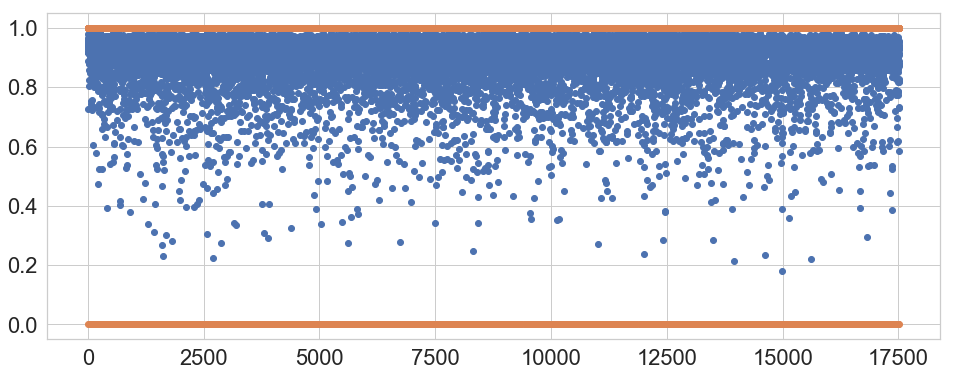

## Following feature is chosen by model, i was trying to observe that if the chosen have correlation among them

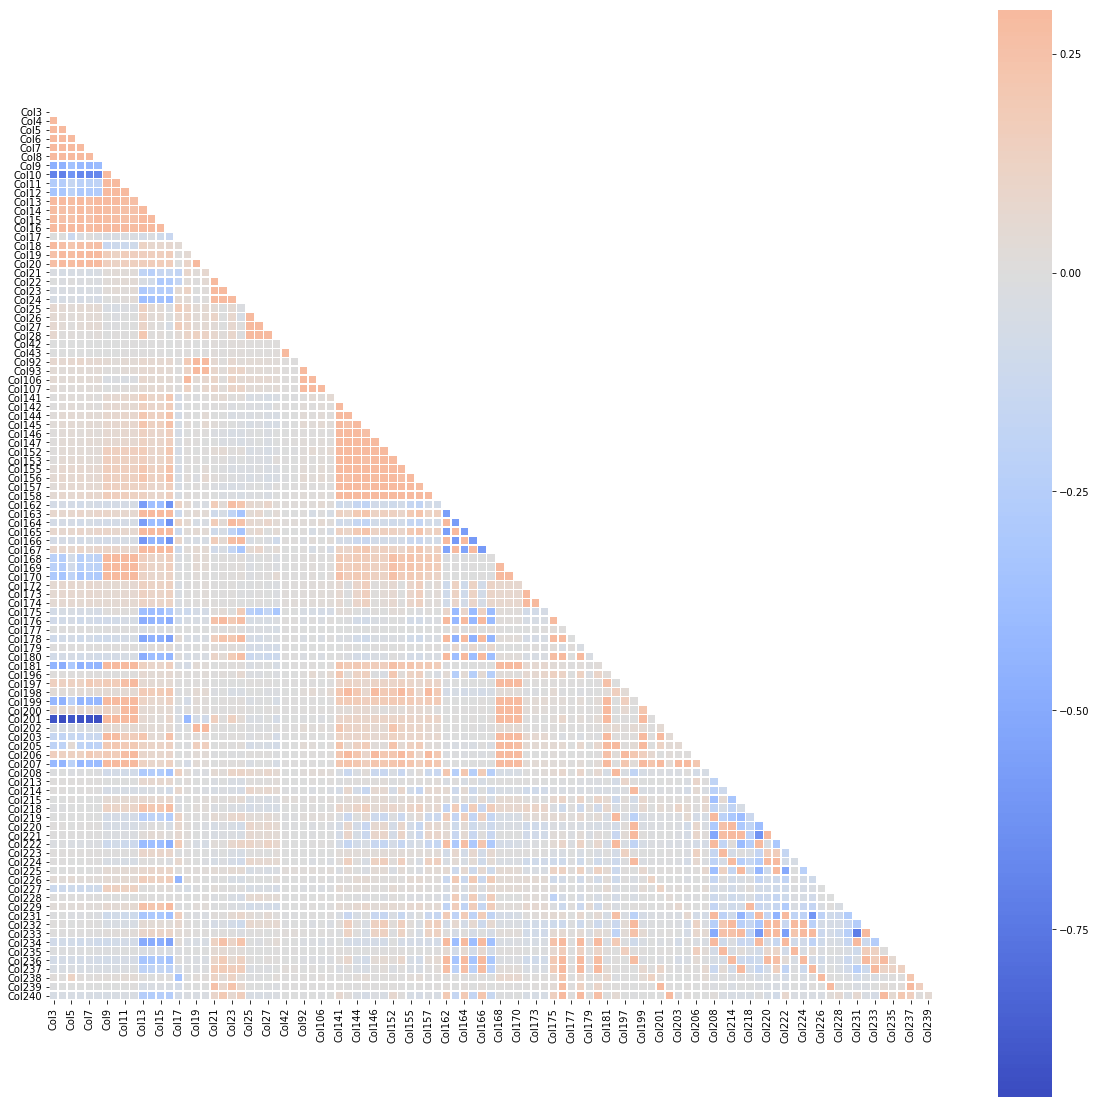

## some of the variables have `99.9%` missing value.
- I dropped all category variable(I tried to create `NULL` as label, but none of my model find them interesting)
- i found all the categorical feature with NULL percentage more than `34%` are useless

In [3]:
#    	col    	type 	per
# 127 	Col485 	cat 	99.960048
# 126 	Col463 	cat 	99.960048
# 119 	Col266 	cat 	99.960048
# 134 	Col813 	cat 	99.960048
# 132 	Col724 	cat 	99.960048
# 120 	Col288 	cat 	99.960048
# 115 	Col171 	cat 	99.372182
# 178 	Col930 	cat 	97.751270
# 13  	Col40 	cat 	97.288968
# 11  	Col38 	cat 	97.226186
# 2375 	Col822 	num 	96.940814
# 2313 	Col535 	num 	96.940814
# 2319 	Col556 	num 	96.940814
# 2360 	Col733 	num 	96.906569
# 2267 	Col338 	num 	96.906569
# 2273 	Col359 	num 	96.906569
# 2380 	Col832 	num 	96.843787
# 2318 	Col545 	num 	96.843787
# 2321 	Col566 	num 	96.843787
# 2275 	Col369 	num 	96.826665
# 2272 	Col348 	num 	96.826665
# 2365 	Col743 	num 	96.826665
# 2394 	Col925 	num 	96.484219
# ... 	... 	... 	...
# 2268 	Col340 	num 	81.616346
# 1836 	Col361 	num 	81.616346
# 2183 	Col823 	num 	81.416586
# 1979 	Col557 	num 	81.416586
# 1965 	Col536 	num 	81.416586
# 1821 	Col339 	num 	81.245363
# 1835 	Col360 	num 	81.245363

## Some feature seems to be replica of others

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4cf20b7940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cf20b7940>)

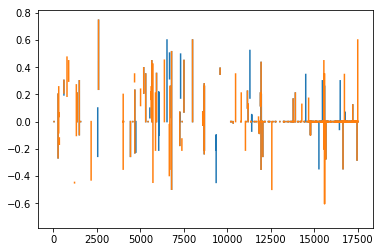

In [35]:
train['Col853'].plot(),train['Col857'].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4cf21ae860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cf21ae860>)

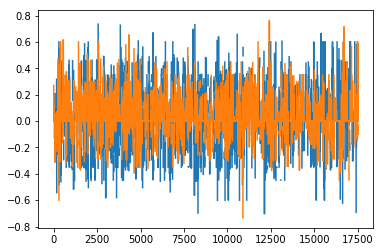

In [36]:
train['Col858'].plot(),train['Col859'].plot()

## Joint-plot of few feature
- i tried this to find, which feature could be helpful for `feature engineering`
- i also observe `col3-col14` represents `account` detail such as `saving, loan amount, other`

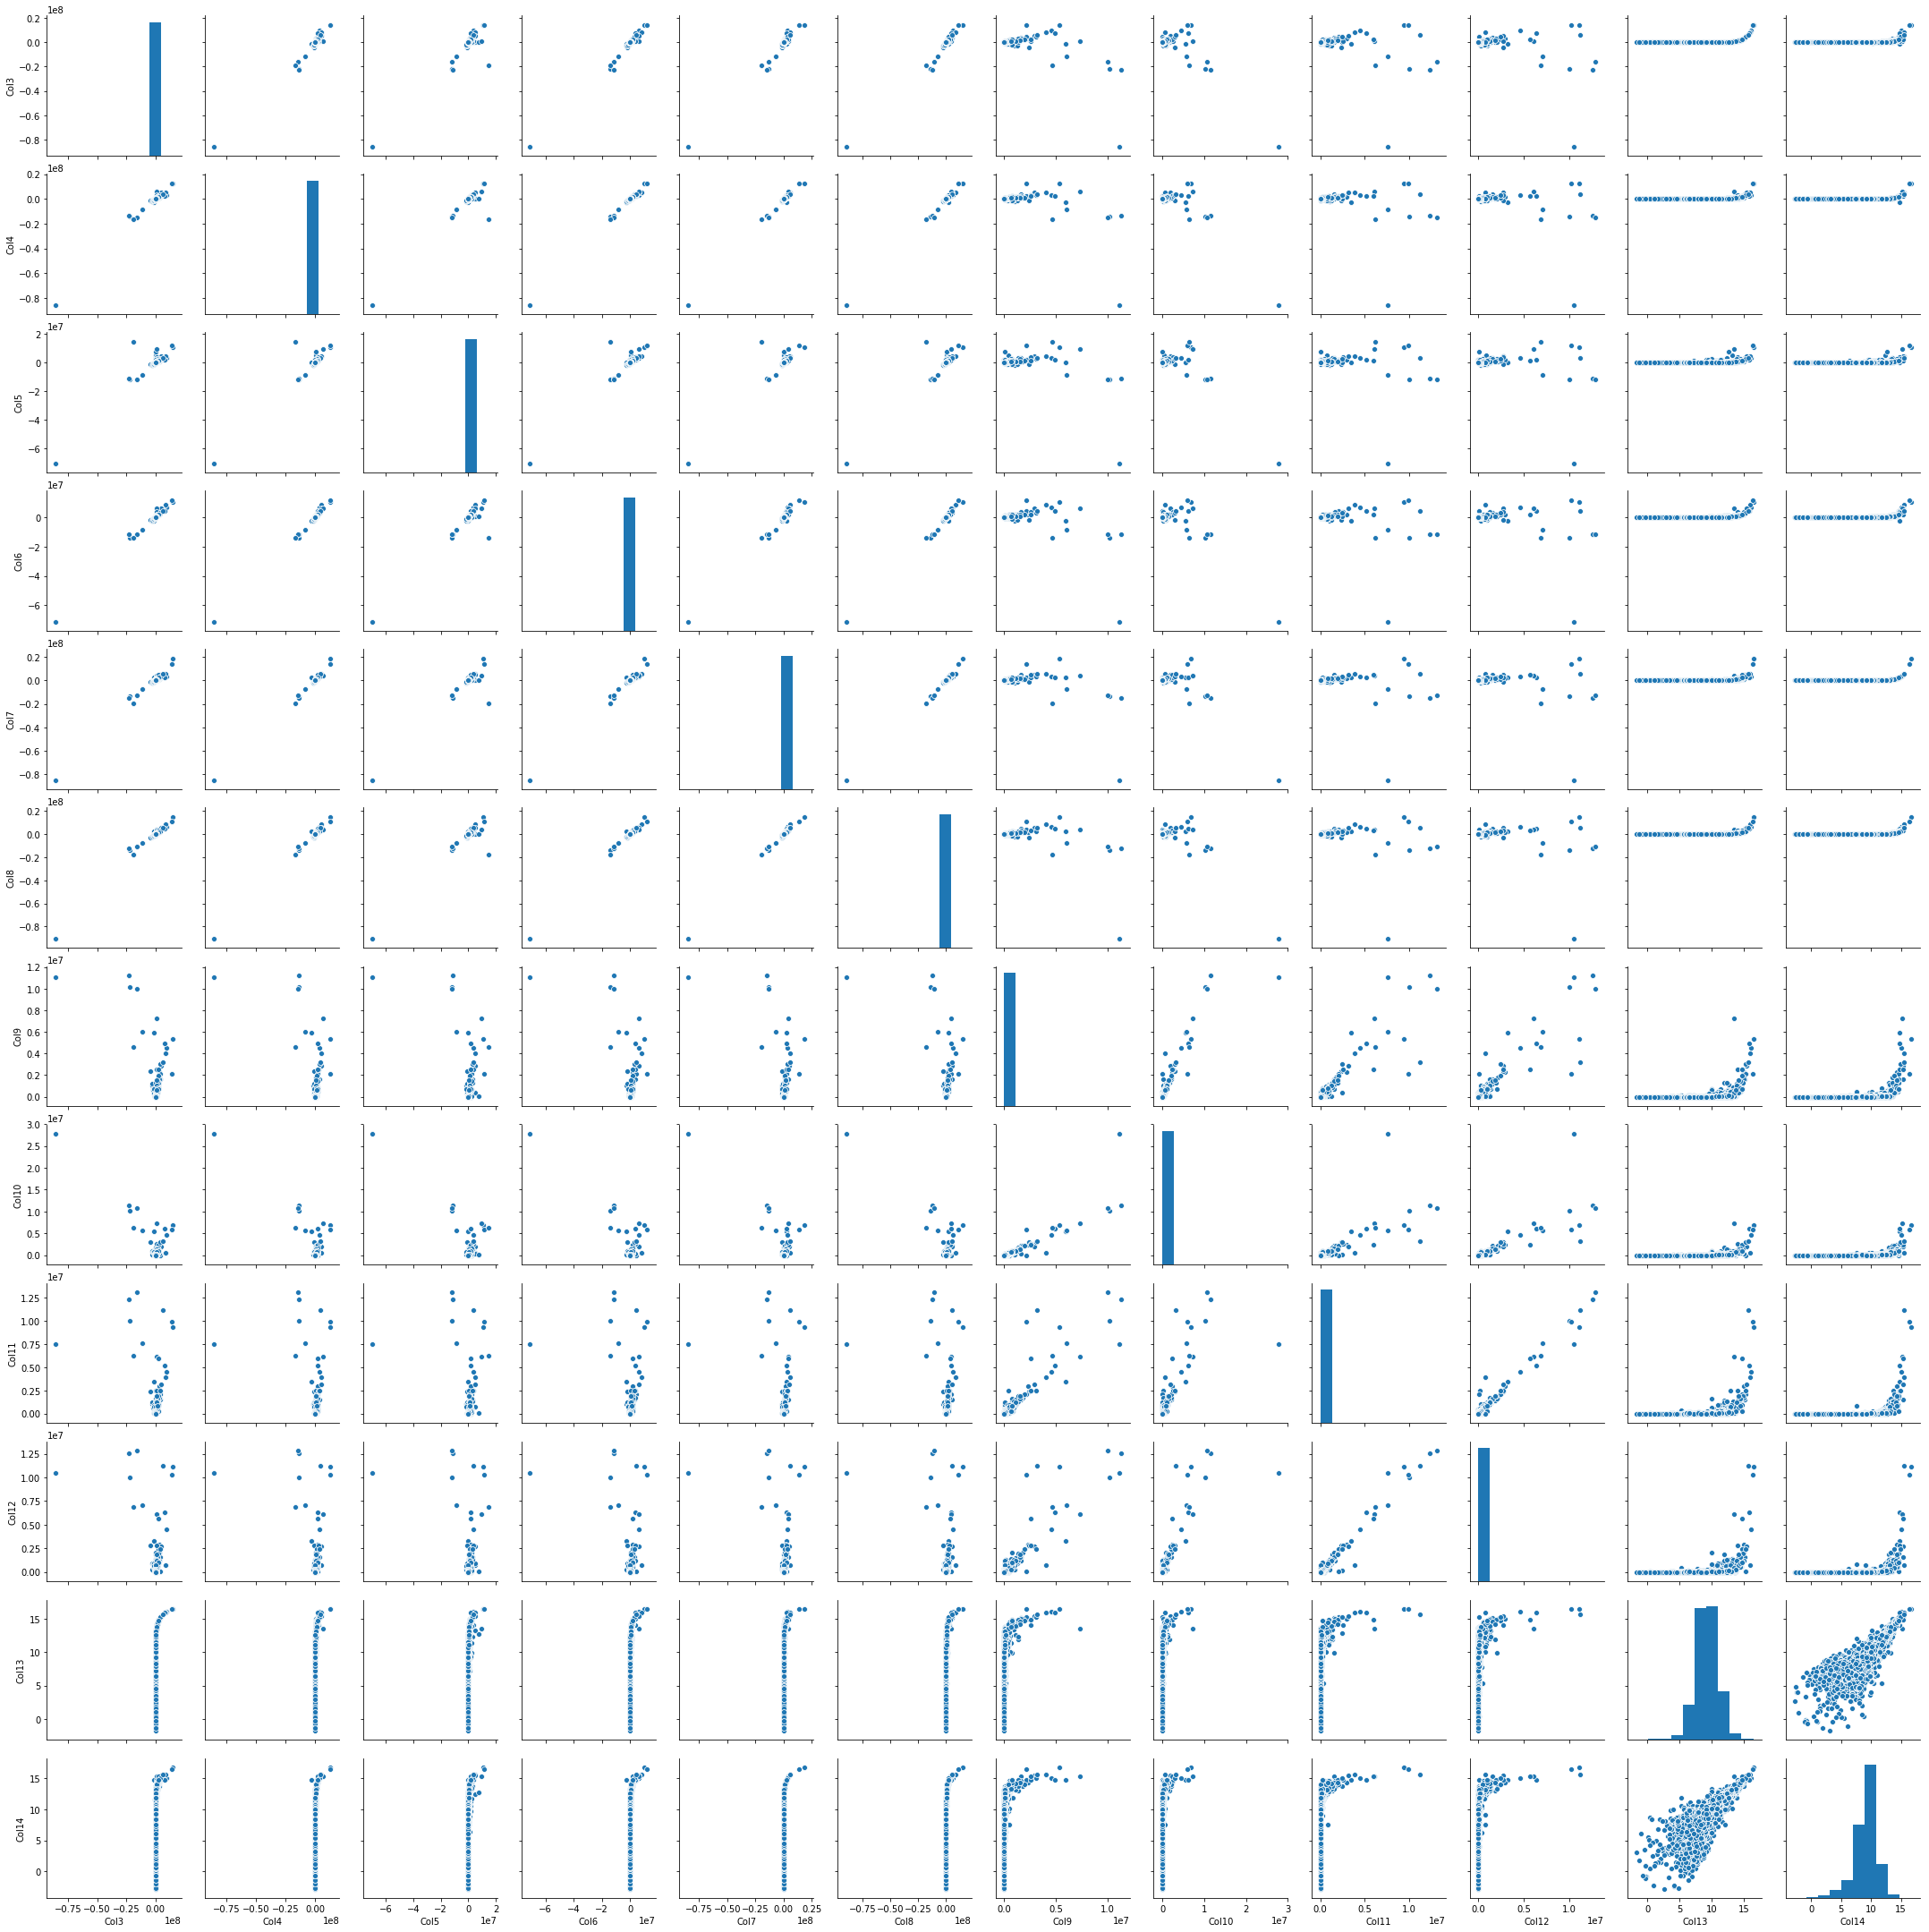

## If we use only following `30` predictors/feature, we will have reasonable score
- most of the `numerical features` have some importance in `gbm model` as well as in `Auto ML`

In [1]:
# S-no	columns 	rel_imp 	sca_imp 	percentage
# ------------------------------------------------------
# 0 	Col141 	2482.739746 	4.000000 	0.492573
# 1 	Col157 	1784.627121 	2.785223 	0.283858
# 2 	Col770 	1518.903397 	2.299982 	0.202071
# 3 	Col146 	1331.083359 	1.983335 	0.166641
# 4 	Col142 	1231.580109 	1.805627 	0.142803
# 5 	Col152 	1189.940491 	1.735086 	0.135963
# 6 	Col158 	1082.997391 	1.603169 	0.126155
# 7 	Col859 	941.143074  	1.427708 	0.110457
# 8 	Col712 	872.583519  	1.321074 	0.099557
# 9 	Col147 	816.666000  	1.227485 	0.089500
# 10 	Col343 	750.114857  	1.119430 	0.076731
# 11 	Col153 	659.452597  	0.970077 	0.062727
# 12 	Col148 	625.814880  	0.925868 	0.059368
# 13 	Col572 	600.625572  	0.887249 	0.055305
# 14 	Col819 	591.438257  	0.869824 	0.052826
# 15 	Col375 	552.594387  	0.802067 	0.048778
# 16 	Col699 	526.582048  	0.765085 	0.046997
# 17 	Col738 	495.478933  	0.711484 	0.043734
# 18 	Col731 	477.591486  	0.686355 	0.042019
# 19 	Col827 	459.398233  	0.660391 	0.040371
# 20 	Col925 	443.199774  	0.631364 	0.038862
# 21 	Col159 	431.078151  	0.611178 	0.036709
# 22 	Col482 	424.444901  	0.600768 	0.035124
# 23 	Col689 	415.684791  	0.588512 	0.034061
# 24 	Col778 	380.638452  	0.548187 	0.031237
# 25 	Col820 	369.445848  	0.534114 	0.030002
# 26 	Col796 	356.842171  	0.516208 	0.028673
# 27 	Col285 	355.060816  	0.513935 	0.028490
# 28 	Col801 	340.458805  	0.491252 	0.026923
# 29 	Col143 	329.762553  	0.474782 	0.026231

## I found a very interesting pattern that most of feature with `null-importance` lie in the columns range of `(1338 - 2385)`

In [2]:
# array(['Col1338', 'Col1340', 'Col1342', 'Col1343', 'Col1348', 'Col1349',
#        'Col1351', 'Col1354', 'Col1355', 'Col1356', 'Col1358', 'Col1362',
#        'Col1363', 'Col1366', 'Col1367', 'Col1368', 'Col1375', 'Col1379',
#        'Col1380', 'Col1382', 'Col1383', 'Col1384', 'Col1385', 'Col1387',
#        'Col1388', 'Col1389', 'Col1391', 'Col1397', 'Col1399', 'Col1400',
#        'Col1402', 'Col1403', 'Col1404', 'Col1406', 'Col1407', 'Col1411',
#        'Col1414', 'Col1415', 'Col1417', 'Col1419', 'Col1420', 'Col1421',
#        'Col1422', 'Col1423', 'Col1428', 'Col1430', 'Col1431', 'Col1432',
#        'Col1433', 'Col1436', 'Col1437', 'Col1438', 'Col1439', 'Col1440',
#        'Col1442', 'Col1443', 'Col1444', 'Col1446', 'Col1447', 'Col1448',
#        'Col1451', 'Col1453', 'Col1456', 'Col1457', 'Col1462', 'Col1468',
#        'Col1469', 'Col1472', 'Col1473', 'Col1474', 'Col1478', 'Col1484',
#        'Col1487', 'Col1488', 'Col1492', 'Col1493', 'Col1494', 'Col1496',
#        'Col1497', 'Col1499', 'Col1500', 'Col1502', 'Col1503', 'Col1505',
#        'Col1508', 'Col1510', 'Col1512', 'Col1513', 'Col1514', 'Col1515',
#        'Col1516', 'Col1520', 'Col1521', 'Col1527', 'Col1530', 'Col1531',
#        'Col1535', 'Col1538', 'Col1542', 'Col1545', 'Col1546', 'Col1547',
#        'Col1549', 'Col1551', 'Col1552', 'Col1554', 'Col1555', 'Col1560',
#        'Col1561', 'Col1562', 'Col1563', 'Col1565', 'Col1569', 'Col1570',
#        'Col1571', 'Col1576', 'Col1577', 'Col1578', 'Col1579', 'Col1581',
#        'Col1582', 'Col1583', 'Col1584', 'Col1587', 'Col1589', 'Col1590',
#        'Col1591', 'Col1593', 'Col1594', 'Col1595', 'Col1597', 'Col1601',
#        'Col1602', 'Col1603', 'Col1606', 'Col1607', 'Col1608', 'Col1609',
#        'Col1610', 'Col1611', 'Col1612', 'Col1617', 'Col1618', 'Col1619',
#        'Col1620', 'Col1622', 'Col1624', 'Col1626', 'Col1627', 'Col1629',
#        'Col1632', 'Col1633', 'Col1634', 'Col1635', 'Col1636', 'Col1638',
#        'Col1639', 'Col1640', 'Col1642', 'Col1643', 'Col1644', 'Col1645',
#        'Col1646', 'Col1649', 'Col1650', 'Col1652', 'Col1653', 'Col1654',
#        'Col1655', 'Col1656', 'Col1670', 'Col1672', 'Col1676', 'Col1679',
#        'Col1686', 'Col1690', 'Col1691', 'Col1698', 'Col1699', 'Col1704',
#        'Col1705', 'Col1707', 'Col1713', 'Col1715', 'Col1716', 'Col1720',
#        'Col1721', 'Col1722', 'Col1723', 'Col1724', 'Col1725', 'Col1729',
#        'Col1731', 'Col1735', 'Col1737', 'Col1739', 'Col1742', 'Col1743',
#        'Col1747', 'Col1749', 'Col1753', 'Col1758', 'Col1762', 'Col1763',
#        'Col1764', 'Col1765', 'Col1766', 'Col1768', 'Col1782', 'Col1785',
#        'Col1786', 'Col1788', 'Col1790', 'Col1792', 'Col1794', 'Col1796',
#        'Col1797', 'Col1801', 'Col1803', 'Col1804', 'Col1805', 'Col1806',
#        'Col1807', 'Col1808', 'Col1809', 'Col1810', 'Col1811', 'Col1812',
#        'Col1813', 'Col1815', 'Col1817', 'Col1822', 'Col1824', 'Col1826',
#        'Col1827', 'Col1832', 'Col1835', 'Col1837', 'Col1838', 'Col1839',
#        'Col1840', 'Col1841', 'Col1842', 'Col1855', 'Col1860', 'Col1862',
#        'Col1863', 'Col1864', 'Col1865', 'Col1866', 'Col1867', 'Col1868',
#        'Col1870', 'Col1874', 'Col1875', 'Col1877', 'Col1880', 'Col1882',
#        'Col1886', 'Col1887', 'Col1888', 'Col1889', 'Col1891', 'Col1895',
#        'Col1898', 'Col1899', 'Col1902', 'Col1905', 'Col1907', 'Col1909',
#        'Col1911', 'Col1913', 'Col1915', 'Col1918', 'Col1922', 'Col1923',
#        'Col1924', 'Col1925', 'Col1927', 'Col1930', 'Col1931', 'Col1932',
#        'Col1933', 'Col1936', 'Col1937', 'Col1946', 'Col1947', 'Col1949',
#        'Col1950', 'Col1951', 'Col1952', 'Col1955', 'Col1956', 'Col1957',
#        'Col1958', 'Col1959', 'Col1966', 'Col1967', 'Col1970', 'Col1971',
#        'Col1972', 'Col1973', 'Col1974', 'Col1975', 'Col1976', 'Col1977',
#        'Col1978', 'Col1979', 'Col1980', 'Col1981', 'Col1986', 'Col1987',
#        'Col1989', 'Col1991', 'Col1993', 'Col1996', 'Col1997', 'Col1998',
#        'Col1999', 'Col2001', 'Col2003', 'Col2005', 'Col2010', 'Col2011',
#        'Col2014', 'Col2015', 'Col2016', 'Col2019', 'Col2022', 'Col2023',
#        'Col2024', 'Col2025', 'Col2029', 'Col2031', 'Col2036', 'Col2038',
#        'Col2040', 'Col2041', 'Col2043', 'Col2044', 'Col2047', 'Col2049',
#        'Col2050', 'Col2052', 'Col2054', 'Col2057', 'Col2060', 'Col2062',
#        'Col2063', 'Col2068', 'Col2069', 'Col2070', 'Col2071', 'Col2072',
#        'Col2073', 'Col2074', 'Col2078', 'Col2079', 'Col2081', 'Col2085',
#        'Col2087', 'Col2092', 'Col2093', 'Col2094', 'Col2095', 'Col2096',
#        'Col2098', 'Col2099', 'Col2102', 'Col2104', 'Col2105', 'Col2110',
#        'Col2112', 'Col2113', 'Col2114', 'Col2118', 'Col2125', 'Col2126',
#        'Col2127', 'Col2128', 'Col2129', 'Col2130', 'Col2131', 'Col2132',
#        'Col2133', 'Col2134', 'Col2135', 'Col2138', 'Col2139', 'Col2140',
#        'Col2141', 'Col2145', 'Col2150', 'Col2151', 'Col2153', 'Col2158',
#        'Col2159', 'Col2161', 'Col2162', 'Col2167', 'Col2168', 'Col2169',
#        'Col2170', 'Col2172', 'Col2173', 'Col2174', 'Col2175', 'Col2176',
#        'Col2177', 'Col2178', 'Col2179', 'Col2181', 'Col2186', 'Col2188',
#        'Col2189', 'Col2191', 'Col2192', 'Col2193', 'Col2194', 'Col2195',
#        'Col2202', 'Col2203', 'Col2204', 'Col2205', 'Col2207', 'Col2208',
#        'Col2209', 'Col2213', 'Col2214', 'Col2215', 'Col2219', 'Col2220',
#        'Col2221', 'Col2222', 'Col2223', 'Col2224', 'Col2225', 'Col2226',
#        'Col2227', 'Col2230', 'Col2231', 'Col2234', 'Col2236', 'Col2240',
#        'Col2242', 'Col2243', 'Col2244', 'Col2251', 'Col2252', 'Col2254',
#        'Col2258', 'Col2259', 'Col2260', 'Col2262', 'Col2265', 'Col2266',
#        'Col2267', 'Col2269', 'Col2271', 'Col2272', 'Col2275', 'Col2282',
#        'Col2283', 'Col2284', 'Col2285', 'Col2291', 'Col2293', 'Col2294',
#        'Col2295', 'Col2298', 'Col2299', 'Col2305', 'Col2306', 'Col2307',
#        'Col2309', 'Col2310', 'Col2312', 'Col2313', 'Col2315', 'Col2316',
#        'Col2317', 'Col2320', 'Col2321', 'Col2323', 'Col2324', 'Col2325',
#        'Col2326', 'Col2327', 'Col2331', 'Col2333', 'Col2337', 'Col2340',
#        'Col2341', 'Col2343', 'Col2344', 'Col2345', 'Col2348', 'Col2350',
#        'Col2351', 'Col2354', 'Col2355', 'Col2356', 'Col2357', 'Col2358',
#        'Col2359', 'Col2362', 'Col2364', 'Col2366', 'Col2369', 'Col2372',
#        'Col2375', 'Col2377', 'Col2380', 'Col2381', 'Col2382', 'Col2383',
#        'Col2385', 'Col2394'], dtype=object)

## variable importance of `distributed-random-forest` and `Gradient-boosting-tree`

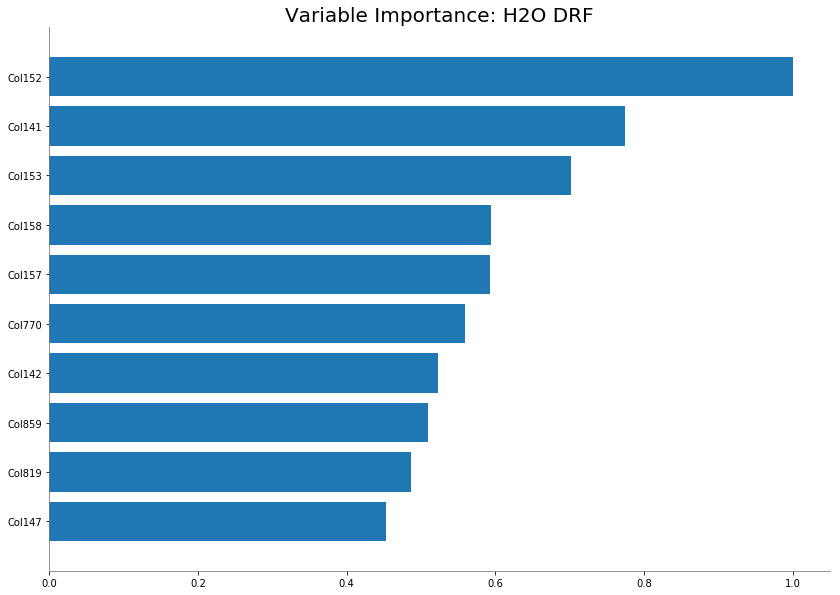

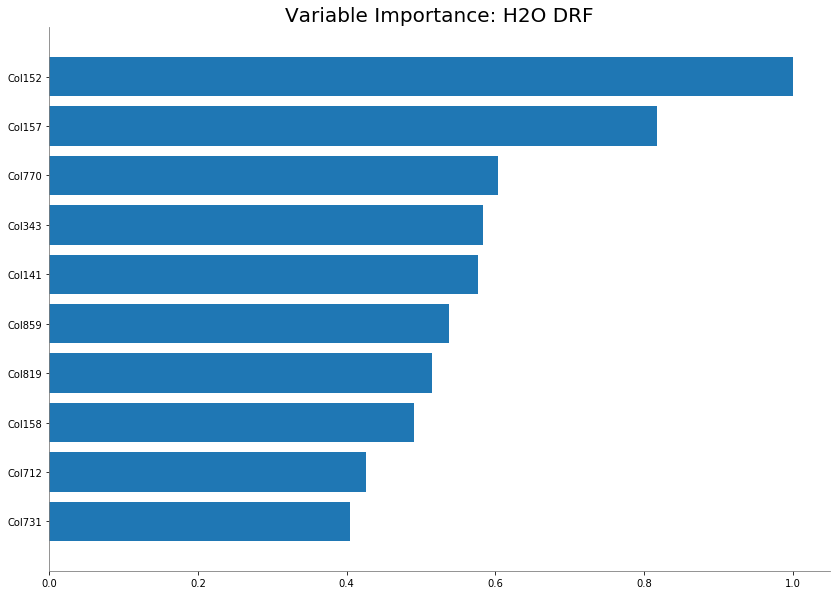

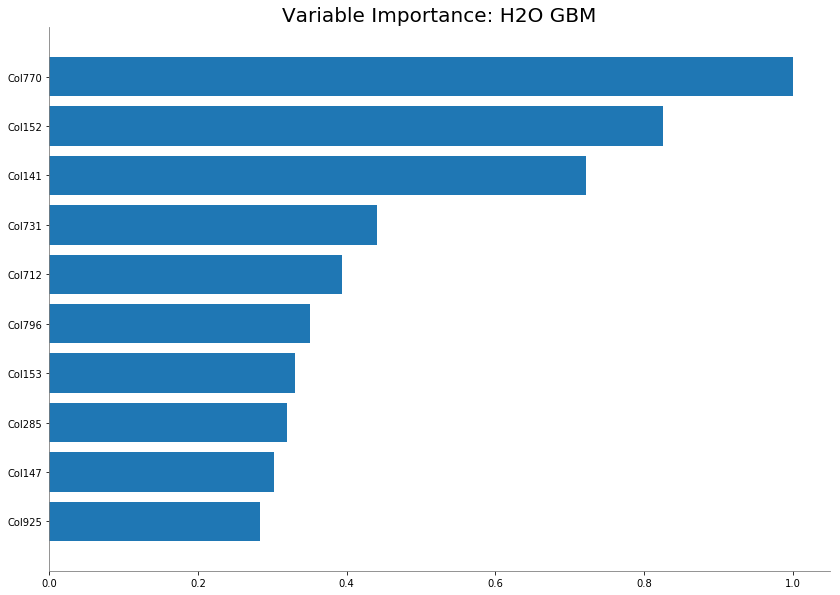

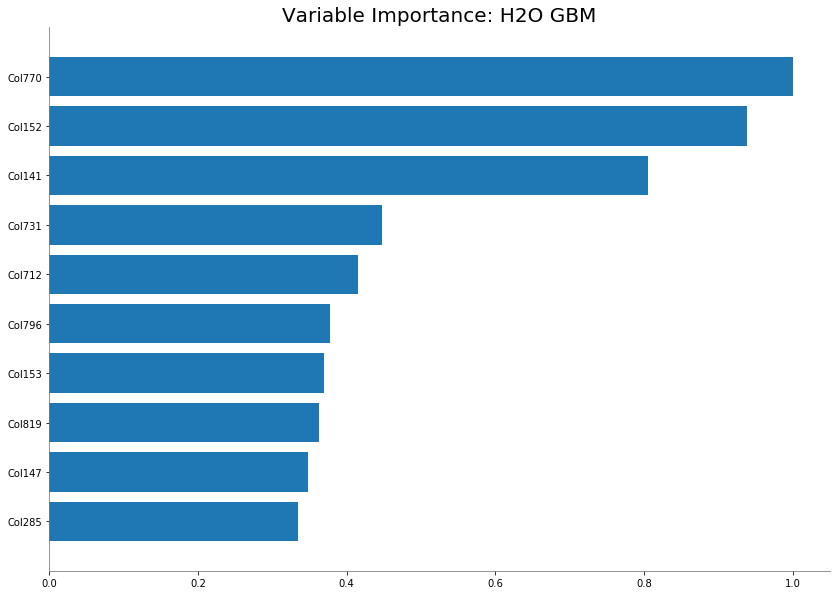